# 📊 **Stock Market Analysis & Visualization**

**Author:** Muyiwa Obadara  
**GitHub:** [mobadara](https://github.com/mobadara)  
**X (Twitter):** [@m_obadara](https://x.com/m_obadara)

---

## 1. **Project Overview**
In this notebook, I analyze historical stock data to uncover trends, calculate returns, and visualize performance.  
This is the **first project** in my finance-focused portfolio, combining Python, finance, and data storytelling.  

---

### **Importing Required Libraries**
In this section, I import the Python packages needed for financial data analysis.  

- **pandas & numpy** → for data handling and numerical computations.  
- **yfinance** → to fetch stock price data directly from Yahoo Finance.  
- **matplotlib & seaborn** → for creating plots and visualizations.  


In [4]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_theme(rc={"figure.figsize": (12, 6)})

In [5]:
print("NumPy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("YFinance Version: ", yf.__version__)
print("Matplotlib Version: ", mpl.__version__)
print("Seaborn Version: ", sns.__version__)

NumPy Version:  2.3.2
Pandas Version:  2.3.2
YFinance Version:  0.2.65
Matplotlib Version:  3.10.6
Seaborn Version:  0.13.2


### **Fetching Stock Data  (())
Here, I use the `yfinance` library to download historical stock prices.  

- Time period: 2020–2025  
- Frequency: Daily (Close, Open, High, Low, Volume)
- Tickers: Apple (AAPL), Tesla (TSLA), and Microsoft (MSFT)  

This dataset will serve as the foundation for return calculations, volatility measurement, and visualization.  


In [10]:
# Choose stocks (you can change this later)
tickers = ["AAPL", "TSLA", "MSFT"]

# Download 5 years of daily data
data = yf.download(tickers, start="2020-01-01", end="2025-01-01", auto_adjust=True)

[*********************100%***********************]  3 of 3 completed


### Data Inspection & Cleaning  
Before diving into analysis, it is essential to inspect the dataset for quality.  

Key checks include:  
- Number of rows and columns in the dataset.  
- First few rows to understand the structure.  
- Presence of **missing values** (NaN).  
- Duplicate entries, if any.  
- Data types of each column.  

This ensures the dataset is clean and reliable for financial analysis.  


In [9]:
# Shape of the dataset
print("Dataset shape:", data.shape)

# Preview the first 5 rows
print("\nFirst 5 rows of the dataset:")             
display(data.head())

# Data types and non-null counts
print("\nDataset info:")
print(data.info())

# Summary statistics
print("\nSummary statistics:")
display(data.describe())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Check for duplicates (unlikely with yfinance, but still good practice)
print("\nDuplicate entries:", data.duplicated().sum())


Dataset shape: (1258, 15)

First 5 rows of the dataset:


Price           Close                              High              \
Ticker           AAPL        MSFT       TSLA       AAPL        MSFT   
Date                                                                  
2020-01-02  72.538521  152.791122  28.684000  72.598899  152.895761   
2020-01-03  71.833290  150.888611  29.534000  72.594055  152.153786   
2020-01-06  72.405670  151.278595  30.102667  72.444313  151.345190   
2020-01-07  72.065155  149.899292  31.270666  72.671348  151.887418   
2020-01-08  73.224396  152.287018  32.809334  73.526287  152.962418   

Price                        Low                              Open  \
Ticker           TSLA       AAPL        MSFT       TSLA       AAPL   
Date                                                                 
2020-01-02  28.713333  71.292311  150.612747  28.114000  71.545897   
2020-01-03  30.266666  71.608685  150.355908  29.128000  71.765667   
2020-01-06  30.104000  70.703005  148.881420  29.333332  70.954181   
2020-01-07  31.441999  71.845377  149.651970  30.224001  72.415345   
2020-01-08  33.232666  71.768071  150.251325  31.215334  71.768071   

Price                                 Volume                       
Ticker            MSFT       TSLA       AAPL      MSFT       TSLA  
Date                                                               
2020-01-02  151.040810  28.299999  135480400  22622100  142981500  
2020-01-03  150.603245  29.366667  146322800  21116200  266677500  
2020-01-06  149.423644  29.364668  118387200  20813700  151995000  
2020-01-07  151.554487  30.760000  108872000  21634100  268231500  
2020-01-08  151.183554  31.580000  132079200  27746500  467164500


Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (Close, MSFT)   1258 non-null   float64
 2   (Close, TSLA)   1258 non-null   float64
 3   (High, AAPL)    1258 non-null   float64
 4   (High, MSFT)    1258 non-null   float64
 5   (High, TSLA)    1258 non-null   float64
 6   (Low, AAPL)     1258 non-null   float64
 7   (Low, MSFT)     1258 non-null   float64
 8   (Low, TSLA)     1258 non-null   float64
 9   (Open, AAPL)    1258 non-null   float64
 10  (Open, MSFT)    1258 non-null   float64
 11  (Open, TSLA)    1258 non-null   float64
 12  (Volume, AAPL)  1258 non-null   int64  
 13  (Volume, MSFT)  1258 non-null   int64  
 14  (Volume, TSLA)  1258 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 157.2 KB
None

Summary statistics:


Price         Close                                   High               \
Ticker         AAPL         MSFT         TSLA         AAPL         MSFT   
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     151.806048   287.533652   213.430922   153.332133   290.309498   
std       41.970402    81.572008    83.461475    42.111163    81.845482   
min       54.316933   129.171265    24.081333    55.316751   134.083611   
25%      126.636374   227.971039   173.882500   127.757504   230.553434   
50%      150.392883   275.338669   220.220001   152.138974   278.761211   
75%      176.399677   332.321289   259.932495   177.954449   335.737652   
max      258.103729   463.240967   479.859985   259.179926   464.023678   

Price                        Low                                   Open  \
Ticker         TSLA         AAPL         MSFT         TSLA         AAPL   
count   1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     218.283913   150.104333   284.503738   208.359167   151.651295   
std       85.396522    41.747076    81.222795    81.534697    41.914049   
min       26.990667    51.469998   126.405063    23.367332    55.215075   
25%      177.230003   124.630098   224.781720   170.044994   126.080059   
50%      225.369995   148.455981   272.160010   215.343338   150.212632   
75%      264.959175   174.830456   329.795840   254.450001   176.205330   
max      488.540009   256.718662   460.169610   457.510010   257.276679   

Price                                   Volume                              
Ticker         MSFT         TSLA          AAPL          MSFT          TSLA  
count   1258.000000  1258.000000  1.258000e+03  1.258000e+03  1.258000e+03  
mean     287.460539   213.482528  9.057103e+07  2.863777e+07  1.255368e+08  
std       81.640096    83.626859  5.324438e+07  1.273673e+07  8.208891e+07  
min      130.687870    24.980000  2.323470e+07  7.164500e+06  2.940180e+07  
25%      228.154883   173.897499  5.546825e+07  2.049260e+07  7.601958e+07  
50%      275.853849   220.933334  7.628335e+07  2.548105e+07  1.019894e+08  
75%      332.213203   259.270004  1.077425e+08  3.290642e+07  1.453064e+08  
max      462.686124   475.899994  4.265100e+08  9.701270e+07  9.140820e+08


Missing values per column:
Price   Ticker
Close   AAPL      0
        MSFT      0
        TSLA      0
High    AAPL      0
        MSFT      0
        TSLA      0
Low     AAPL      0
        MSFT      0
        TSLA      0
Open    AAPL      0
        MSFT      0
        TSLA      0
Volume  AAPL      0
        MSFT      0
        TSLA      0
dtype: int64

Duplicate entries: 0


The dataset has no duplicate entries and no missing value. The analysis is good to go.

### **Exploratory Data Analysis (EDA)**
The first step is to explore and visualize the raw stock price data.  

- Line plot of adjusted close prices over time.  
- Summary statistics (mean, standard deviation, min, max).  

This helps in identifying general trends, growth patterns, and volatility.  


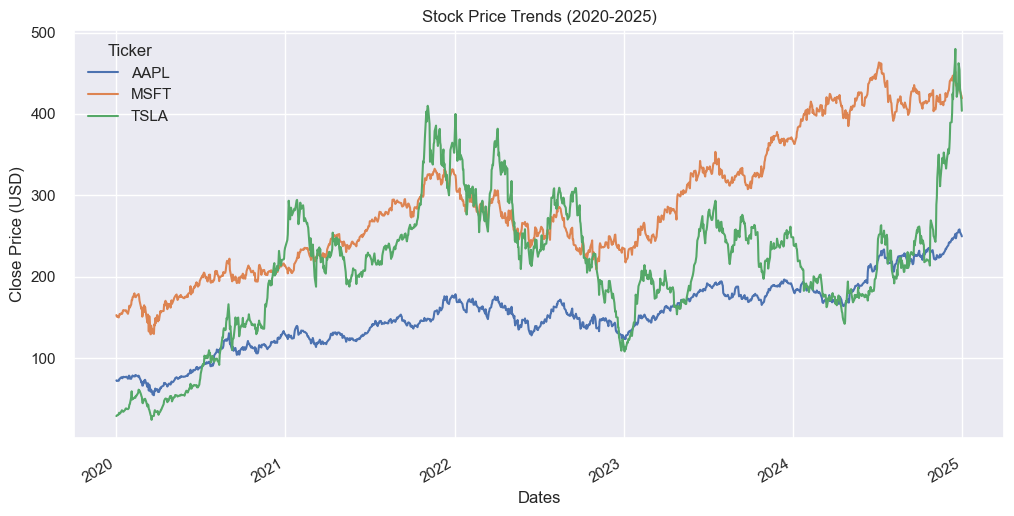

In [26]:
# Plot stock prices
data["Close"].plot(title="Stock Price Trends (2020-2025)")
plt.ylabel("Close Price (USD)")
plt.xlabel("Dates")
plt.show()


### **Calculating Returns and Volatility**
To understand stock performance, I calculate:  

- **Daily Returns** → percentage change in closing price from one day to the next.  
- **Cumulative Returns** → growth of an initial $1 investment over time.  
- **Volatility** → measured as rolling standard deviation of returns (30-day window).  

These metrics show both risk and reward associated with each stock.  

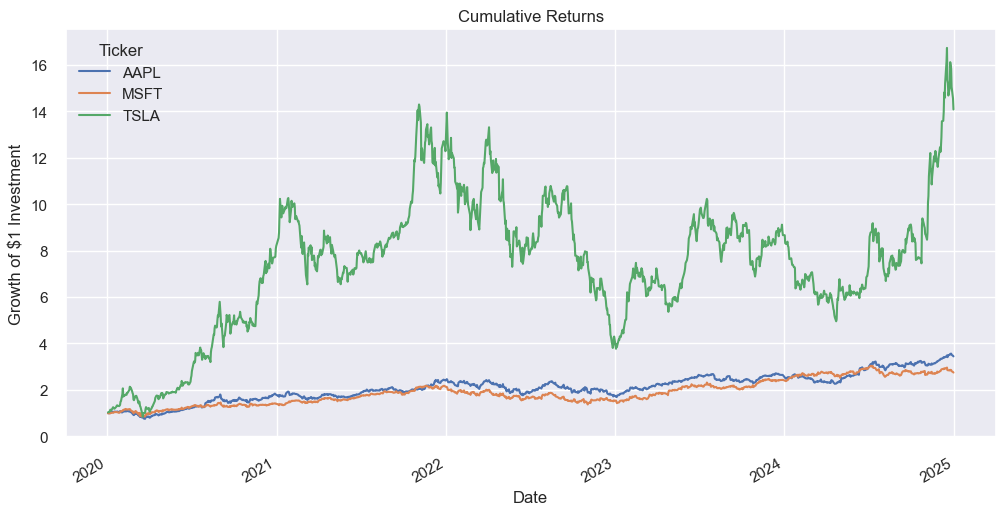

In [28]:
# Daily returns
returns = data["Close"].pct_change().dropna()

# Cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Volatility (30-day rolling std)
volatility = returns.rolling(window=30).std()

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns")
plt.ylabel("Growth of $1 Investment")
plt.show()


### Moving Averages (Trend Analysis)  
Moving averages are commonly used in finance to smooth out short-term price fluctuations and highlight long-term trends.  

- **50-day MA** → medium-term trend indicator.  
- **200-day MA** → long-term trend indicator.  

By plotting these alongside the actual stock price, we can observe bullish or bearish signals.  


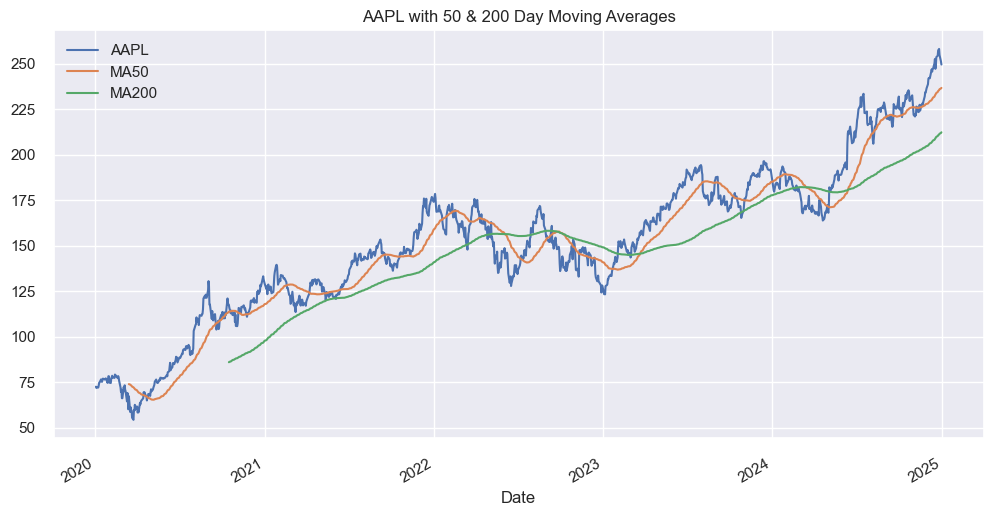

In [30]:
# Example with AAPL
aapl = data["Close"]["AAPL"].to_frame()
aapl["MA50"] = aapl["AAPL"].rolling(window=50).mean()
aapl["MA200"] = aapl["AAPL"].rolling(window=200).mean()

aapl.plot(title="AAPL with 50 & 200 Day Moving Averages")
plt.show()
